In [382]:
# ANALYSIS
# 1.    After review, the data reflected a pattern between temerpature and latitude. 
    #   As expected, the closer the data moved to the equater, the greater the increase in temperature. 
    #   Surprisingly, however, the parabolic data did not seem to peak at exactly 0 latitude.

# 2.    The data did not originally reflect a correlation between latitude and humidity and cloudiness
    #   However, after performing linear regression, both variables appeared to have a positive correlation with latitude. 
    #   Giving the inclination that, cloudiness dissipates the farther one travles from the equator. 

# 3.    The data lastly reflected differing wind speed correlations between the northern and southern hemisphere.
    #   Per the data, there appears to be a significantly stronger correlation between northern hemisphere wind speed and southern hemisphere wind speed.
    #   Giving the inclination that, wind speeds increase more drastically the farther north of the equator one travels comapred to the farther south one travels from the equator. 

In [383]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
from pprint import pprint

# Import API key

from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)

output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes

lat_range = (-90, 90)
lng_range = (-180, 180)

In [384]:
cities_df = pd.read_csv(output_data_file)
cities_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [385]:
# GENERATE CITIES LIST

 # List for holding lat_lngs and cities

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)

608

In [386]:
# PERFORM API CALLS

# Grab the url and unit for the API call

url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'Imperial'

# Query the url

url = f'{url}&appid={weather_api_key}&units={units}&q='

# Preview the dataset to view the setup

data = requests.get(qurl + city).json()
pprint(data)

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 42.097, 'lon': -79.2353},
 'dt': 1632266532,
 'id': 5122534,
 'main': {'feels_like': 68.47,
          'humidity': 84,
          'pressure': 1019,
          'temp': 68.02,
          'temp_max': 69.39,
          'temp_min': 65.34},
 'name': 'Jamestown',
 'sys': {'country': 'US',
         'id': 2008828,
         'sunrise': 1632222211,
         'sunset': 1632266183,
         'type': 2},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 138, 'gust': 3, 'speed': 1.99}}


In [387]:
# Create empty lists for data storing

city_list = []
country = []
lat = []
lng = []
date = []
clouds = []
temp_max = []
humidity = []
wind_speed = []

In [363]:
# PERFORM API CALLS

# Perform a weather check on each city using a series of successive API calls
# Include a print log of each city as it's being processed (with the city number and city name)
# Include a try and except

print("Beginning Data Retrieval")
print("-----------------------------")

for x in cities: 
    try:
        data = requests.get(qurl + x).json()
        city_list.append(data['name'])
        country.append(data['sys']['country'])
        lat.append(data['coord']['lat'])  
        lng.append(data['coord']['lon'])
        date.append(data['dt'])
        clouds.append(data['clouds']['all'])
        temp_max.append(data['main']['temp_max'])
        humidity.append(data['main']['humidity'])
        wind_speed.append(data['wind']['speed'])
        print(f'Processing Record {i} of Set {i} | {x}')
        i += 1
    except (KeyError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1125 of Set 1125 | mar del plata
City not found. Skipping...
Processing Record 1126 of Set 1126 | woodward
Processing Record 1127 of Set 1127 | thompson
City not found. Skipping...
Processing Record 1128 of Set 1128 | souillac
Processing Record 1129 of Set 1129 | kirakira
Processing Record 1130 of Set 1130 | haines junction
Processing Record 1131 of Set 1131 | aklavik
Processing Record 1132 of Set 1132 | jamestown
City not found. Skipping...
Processing Record 1133 of Set 1133 | barrow
Processing Record 1134 of Set 1134 | kot addu
Processing Record 1135 of Set 1135 | conde
Processing Record 1136 of Set 1136 | torbay
Processing Record 1137 of Set 1137 | hobart
Processing Record 1138 of Set 1138 | minna
Processing Record 1139 of Set 1139 | ushuaia
Processing Record 1140 of Set 1140 | araouane
City not found. Skipping...
City not found. Skipping...
Processing Record 1141 of Set 1141 | faanui
Processing Record 1142 of 

In [364]:
# CONVERT RAW DATA TO DATAFRAME

# Export the city data into a .csv
# Display the DataFrame

df = pd.DataFrame({
    'City' : city_list,
    'Lat' : lat,
    'Lng' : lng,
    'Max Temp' : temp_max,
    'Humidity' : humidity,
    'Cloudiness' : clouds,
    'Wind Speed' : wind_speed,
    'Country' : country,
    'Date' : date,
})

df.to_csv('output_data/city_weather.csv')
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar del Plata,-38.0023,-57.5575,47.37,73,0,7.76,AR,1632266546
1,Woodward,36.4337,-99.3904,74.97,30,1,13.80,US,1632266547
2,Thompson,55.7435,-97.8558,48.36,61,40,2.30,CA,1632266547
3,Souillac,-20.5167,57.5167,70.18,64,75,11.50,MU,1632266248
4,Kirakira,-10.4544,161.9205,83.70,72,48,5.48,SB,1632266548


In [365]:
# PERFORM SATISTICAL ANALYSIS

df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,20.382415,18.617008,64.139281,70.275180,54.764388,7.725450,1.632267e+09
std,32.856301,89.310257,16.914545,22.674862,39.741329,5.943864,1.110365e+02
min,-54.800000,-179.166700,11.500000,7.000000,0.000000,0.000000,1.632266e+09
25%,-7.473250,-63.649275,52.562500,59.000000,10.750000,3.440000,1.632267e+09
50%,26.739250,25.180600,68.030000,77.000000,64.500000,6.185000,1.632267e+09
75%,47.742800,95.321600,77.325000,87.000000,96.000000,10.597500,1.632267e+09
max,78.218600,179.316700,100.490000,100.000000,100.000000,41.320000,1.632267e+09


In [366]:
# INSPECT THE DATA AND REMOVE THE CITIES WHERE THE HUMIDITY IS > 100%

df['Humidity'].max()

# Skip this step because there are no cities that have humidity > 100% (the max is 99%)

100

In [367]:
# PLOTTING THE DATA

# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels
# Save the plotted figures as .pngs

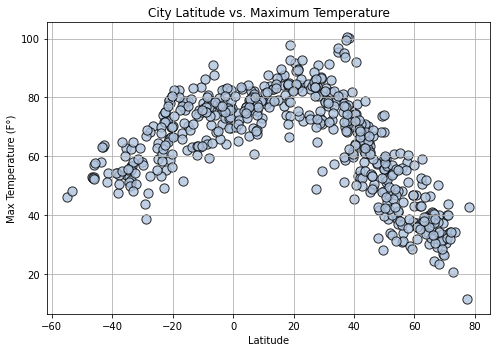

In [368]:
# Latitude vs Temperature Plot

figure_1 = df.plot(
    kind= 'scatter',
    x ='Lat',
    y = 'Max Temp',
    title = 'City Latitude vs. Maximum Temperature',
    figsize = (7, 5),
    s = 85,
    color = 'lightsteelblue',
    edgecolor = 'black',
    marker ="o",
    alpha = 0.8,
    grid = True,
    ylim = (min(df['Max Temp']) - 5, max(df['Max Temp'] + 5))
    )
    
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F°)')
plt.tight_layout()
plt.savefig('output_data/latitude_vs_maxtemp.png')

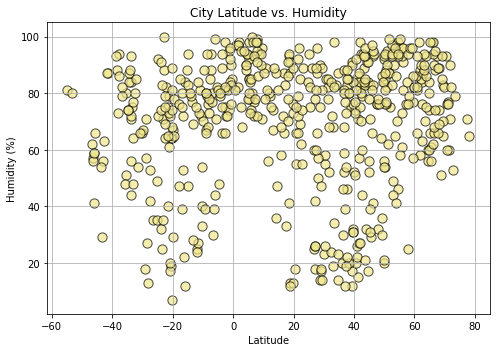

In [369]:
# Latitude vs. Humidity Plot

figure_2 = df.plot(
    kind= 'scatter',
    x ='Lat',
    y = 'Humidity',
    title = 'City Latitude vs. Humidity',
    figsize = (7, 5),
    s = 85,
    color = 'khaki',
    edgecolor = 'black',
    marker ="o",
    alpha = 0.7,
    grid = True,
    ylim = (min(df['Humidity']) - 5, max(df['Humidity'] + 5))
)

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout()
plt.savefig('output_data/latitude_vs_humidity.png')

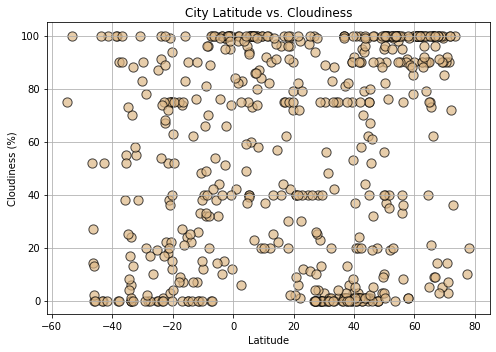

In [370]:
# Latitude vs. Cloudiness Plot

figure_3 = df.plot(
    kind= 'scatter',
    x ='Lat',
    y = 'Cloudiness',
    title = 'City Latitude vs. Cloudiness',
    figsize = (7, 5),
    s = 85,
    color = 'burlywood',
    edgecolor = 'black',
    marker ="o",
    alpha = 0.7,
    grid = True,
    ylim = (min(df['Cloudiness']) - 5, max(df['Cloudiness'] + 5))
    )
    
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()
plt.savefig('output_data/latitude_vs_cloudiness.png')

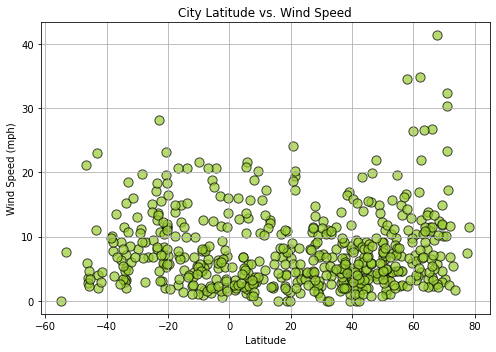

In [371]:
# Latitude vs Wind Speed Plot

figure_4 = df.plot(
    kind= 'scatter',
    x ='Lat',
    y = 'Wind Speed',
    title = 'City Latitude vs. Wind Speed',
    figsize = (7, 5),
    s = 85,
    color = 'yellowgreen',
    edgecolor = 'black',
    marker ="o",
    alpha = 0.7,
    grid = True,
    ylim = (min(df['Wind Speed']) - 2, max(df['Wind Speed'] + 2))
    )
    
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.tight_layout()
plt.savefig('output_data/latitude_vs_windspeed.png')

In [372]:
# LINEAR REGRESSION

In [373]:
# Set the northern and southern hemisphere

north_hemisphere = df[df['Lat'] >= 0]
south_hemisphere = df[df['Lat'] <= 0]

The r-value is: -0.8064246840607356


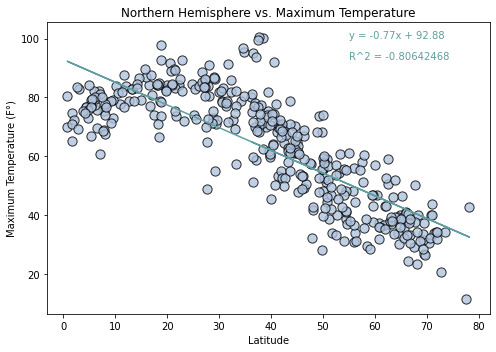

In [374]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_hemisphere['Lat'], north_hemisphere['Max Temp'])
regress = north_hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

north_hemisphere.plot(
    kind= 'scatter', x = 'Lat', y = 'Max Temp',
    title = 'Northern Hemisphere vs. Maximum Temperature',
    figsize = (7, 5),
    s = 85,
    color = 'lightsteelblue',
    edgecolor = 'black',
    marker ="o",
    alpha = 0.8,
    ylim = (min(north_hemisphere['Max Temp']) - 5, max(north_hemisphere['Max Temp'] + 5))
    )

plt.plot(north_hemisphere['Lat'], regress, "r-", color = "cadetblue")
plt.annotate(line_eq, (55, 100), fontsize = 10, color = "cadetblue")
plt.text(55, 93, 'R^2 = %0.8f' % rvalue, color = "cadetblue")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F°)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('output_data/nothern_hemisphere_vs_maxtemp.png')

The r-value is: 0.7308983801597941


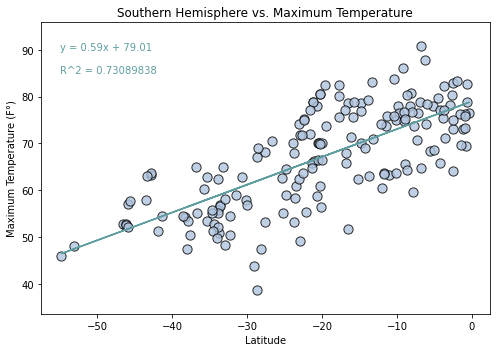

In [375]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_hemisphere['Lat'], south_hemisphere['Max Temp'])
regress = south_hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

south_hemisphere.plot(
    kind= 'scatter',x = 'Lat', y = 'Max Temp',
    title = 'Southern Hemisphere vs. Maximum Temperature',
    figsize = (7, 5),
    s = 85,
    color = 'lightsteelblue',
    edgecolor = 'black',
    marker ="o",
    alpha = 0.8,
    ylim = (min(south_hemisphere['Max Temp']) - 5, max(south_hemisphere['Max Temp'] + 5))
    )
    
plt.plot(south_hemisphere['Lat'], regress, "r-", color = "cadetblue")
plt.annotate(line_eq, (-55, 90), fontsize = 10, color = "cadetblue")
plt.text(-55, 85, 'R^2 = %0.8f' % rvalue, color = "cadetblue")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F°)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('output_data/southern_hemisphere_vs_maxtemp.png')

The r-value is: -0.00403154958403814


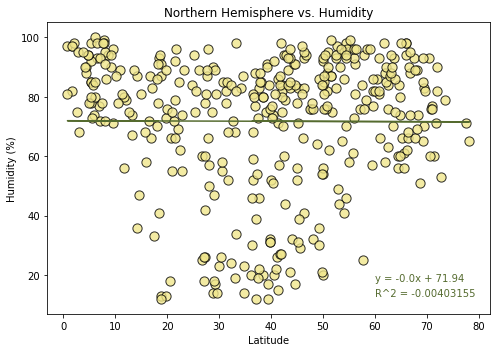

In [376]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_hemisphere['Lat'], north_hemisphere['Humidity'])
regress = north_hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

north_hemisphere.plot(
    kind= 'scatter', x = 'Lat', y = 'Humidity',
    title = 'Northern Hemisphere vs. Humidity',
    figsize = (7, 5),
    s = 85,
    color = 'khaki',
    edgecolor = 'black',
    marker ="o",
    alpha = 0.8,
    ylim = (min(north_hemisphere['Humidity']) - 5, max(north_hemisphere['Humidity'] + 5))
    )

plt.plot(north_hemisphere['Lat'], regress, "r-", color = "darkolivegreen")
plt.annotate(line_eq, (60, 18), fontsize = 10, color = "darkolivegreen")
plt.text(60, 13, 'R^2 = %0.8f' % rvalue, color = "darkolivegreen", fontsize = 10)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('output_data/nothern_hemisphere_vs_humidity.png')

The r-value is: 0.13282819514850747


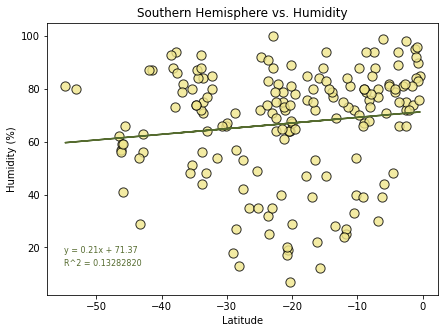

In [377]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_hemisphere['Lat'], south_hemisphere['Humidity'])
regress = south_hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

south_hemisphere.plot(
    kind= 'scatter', x = 'Lat', y = 'Humidity',
    title = 'Southern Hemisphere vs. Humidity',
    figsize = (7, 5),
    s = 85,
    color = 'khaki',
    edgecolor = 'black',
    marker ="o",
    alpha = 0.8,
    ylim = (min(south_hemisphere['Humidity']) - 5, max(south_hemisphere['Humidity'] + 5))
    )

plt.plot(south_hemisphere['Lat'], regress, "r-", color = "darkolivegreen")
plt.annotate(line_eq, (-55, 18), fontsize = 8, color = "darkolivegreen")
plt.text(-55,13, 'R^2 = %0.8f' % rvalue, color = "darkolivegreen", fontsize = 8)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.savefig('output_data/southern_hemisphere_vs_humidity.png')

The r-value is: 0.0730267577981975


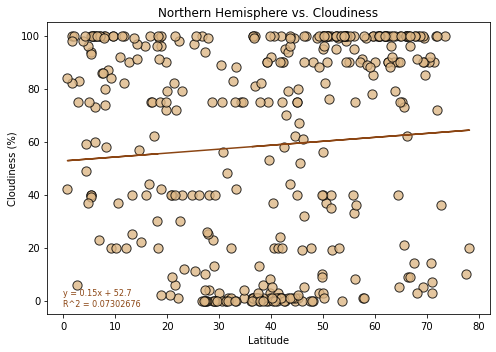

In [378]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_hemisphere['Lat'], north_hemisphere['Cloudiness'])
regress = north_hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

north_hemisphere.plot(
    kind= 'scatter', x = 'Lat', y = 'Cloudiness',
    title = 'Northern Hemisphere vs. Cloudiness',
    figsize = (7, 5),
    s = 85,
    color = 'burlywood',
    edgecolor = 'black',
    marker ="o",
    alpha = 0.8,
    ylim = (min(north_hemisphere['Cloudiness']) - 5, max(north_hemisphere['Cloudiness'] + 5))
    )

plt.plot(north_hemisphere['Lat'], regress, "r-", color = 'saddlebrown')
plt.annotate(line_eq, (0, 2), fontsize = 8, color = 'saddlebrown')
plt.text(0, -2, 'R^2 = %0.8f' % rvalue, color = 'saddlebrown', fontsize = 8)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('output_data/nothern_hemisphere_vs_cloudiness.png')

The r-value is: 0.2143234419018605


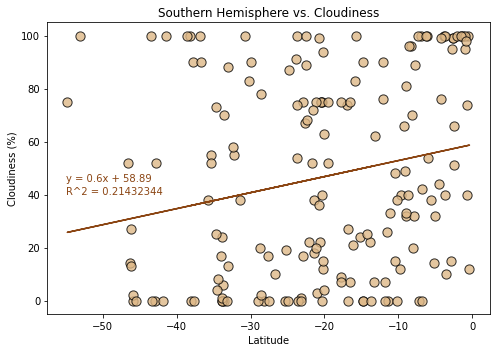

In [379]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_hemisphere['Lat'], south_hemisphere['Cloudiness'])
regress = south_hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

south_hemisphere.plot(
    kind= 'scatter', x = 'Lat', y = 'Cloudiness',
    title = 'Southern Hemisphere vs. Cloudiness',
    figsize = (7, 5),
    s = 85,
    color = 'burlywood',
    edgecolor = 'black',
    marker ="o",
    alpha = 0.8,
    ylim = (min(south_hemisphere['Cloudiness']) - 5, max(south_hemisphere['Cloudiness'] + 5))
    )

plt.plot(south_hemisphere['Lat'], regress, "r-", color = "saddlebrown")
plt.annotate(line_eq, (-55, 45), fontsize = 10, color = "saddlebrown")
plt.text(-55, 40, 'R^2 = %0.8f' % rvalue, color = "saddlebrown", fontsize = 10)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('output_data/southern_hemisphere_vs_cloudiness.png')

The r-value is: 0.196791014212279


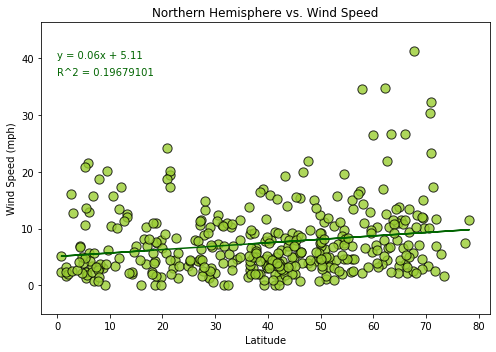

In [380]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(north_hemisphere['Lat'], north_hemisphere['Wind Speed'])
regress = north_hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

north_hemisphere.plot(
    kind= 'scatter', x = 'Lat', y = 'Wind Speed',
    title = 'Northern Hemisphere vs. Wind Speed',
    figsize = (7, 5),
    s = 85,
    color = 'yellowgreen',
    edgecolor = 'black',
    marker ="o",
    alpha = 0.8,
    ylim = (min(north_hemisphere['Wind Speed'] - 5), max(north_hemisphere['Wind Speed'] + 5))
    )

plt.plot(north_hemisphere['Lat'], regress, "r-", color = "darkgreen")
plt.annotate(line_eq, (0, 40), fontsize = 10, color = "darkgreen")
plt.text(0, 37, 'R^2 = %0.8f' % rvalue, color = "darkgreen", fontsize = 10)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('output_data/northern_hemisphere_vs_windspeed.png')

The r-value is: -0.0293944880954416


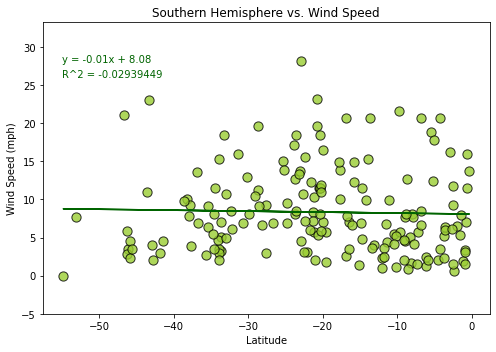

In [381]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(south_hemisphere['Lat'], south_hemisphere['Wind Speed'])
regress = south_hemisphere['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

south_hemisphere.plot(
    kind= 'scatter', x = 'Lat', y = 'Wind Speed',
    title = 'Southern Hemisphere vs. Wind Speed',
    figsize = (7, 5),
    s = 85,
    color = 'yellowgreen',
    edgecolor = 'black',
    marker ="o",
    alpha = 0.8,
    ylim = (min(south_hemisphere['Wind Speed'] - 5), max(south_hemisphere['Wind Speed'] + 5))
    )

plt.plot(south_hemisphere['Lat'], regress, "r-", color = "darkgreen")
plt.annotate(line_eq, (-55, 28), fontsize = 10, color = "darkgreen")
plt.text(-55, 26, 'R^2 = %0.8f' % rvalue, color = "darkgreen", fontsize = 10)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.tight_layout()
print(f"The r-value is: {rvalue}")
plt.savefig('output_data/southern_hemisphere_vs_windspeed.png')